In [1]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import pandas
import seaborn
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix ,accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.neighbors import KNeighborsClassifier 
seaborn.set(style='ticks')
dataset = pd.read_csv("data.csv")

In [2]:
dataset.columns

Index(['Unnamed: 0', 'match_event_id', 'location_x', 'location_y',
       'remaining_min', 'power_of_shot', 'knockout_match', 'game_season',
       'remaining_sec', 'distance_of_shot', 'is_goal', 'area_of_shot',
       'shot_basics', 'range_of_shot', 'team_name', 'date_of_game',
       'home/away', 'shot_id_number', 'lat/lng', 'type_of_shot',
       'type_of_combined_shot', 'match_id', 'team_id', 'remaining_min.1',
       'power_of_shot.1', 'knockout_match.1', 'remaining_sec.1',
       'distance_of_shot.1'],
      dtype='object')

In [3]:
dataset.location_x.mode()

0    0.0
dtype: float64

In [4]:
dataset["location_y"].mode()

0    0.0
dtype: float64

In [5]:
dataset.location_x.fillna(0.0, inplace = True)
dataset["location_y"].fillna(0.0 , inplace =True)

In [6]:
dataset.isna().sum()

Unnamed: 0                   0
match_event_id            1563
location_x                   0
location_y                   0
remaining_min             1562
power_of_shot             1486
knockout_match            1517
game_season               5862
remaining_sec             1594
distance_of_shot          1567
is_goal                   6268
area_of_shot              1502
shot_basics               1575
range_of_shot             1564
team_name                 1535
date_of_game              1550
home/away                 1497
shot_id_number            1563
lat/lng                   1565
type_of_shot             15280
type_of_combined_shot    15417
match_id                     0
team_id                      0
remaining_min.1           1535
power_of_shot.1           1539
knockout_match.1          1493
remaining_sec.1           1539
distance_of_shot.1        1568
dtype: int64

In [7]:
dataset["shot_id_number"].interpolate(method="linear" , ax=1 , inplace=True)
count = 0
for i in tqdm(range(len(dataset))):
    if dataset["shot_id_number"][i] == i+1:
        count += 1
count

100%|████████████████████████████████████| 30697/30697 [00:00<00:00, 36863.88it/s]


30697

In [8]:
dataset["game_season"].value_counts()

2005-06    1911
2002-03    1823
2008-09    1810
2007-08    1733
2009-10    1665
2001-02    1632
2006-07    1537
2000-01    1488
2010-11    1462
2003-04    1329
2011-12    1326
2012-13    1296
1999-00    1264
2004-05    1074
2015-16     893
1997-98     804
1998-99     752
2014-15     594
1996-97     381
2013-14      61
Name: game_season, dtype: int64

In [9]:
dataset["game_season"].fillna(method="ffill" , inplace=True)
dataset["knockout_match"].fillna(method ="bfill" , inplace=True)

In [10]:
dataset["team_id"].unique()

array([1610612747], dtype=int64)

In [11]:
dataset["team_name"].unique()

array(['Manchester United', nan], dtype=object)

In [12]:
def loc(col , is_string):
    bool_series = dataset[col].isna()
    testdata = dataset[bool_series]
    false_series = dataset[col].notnull()
    training_data = dataset[false_series]
    
    df = pandas.DataFrame({
        'loc_x': training_data['location_x'],
        'loc_y': training_data['location_y'],
        'Col': training_data[col]
    })
    df1 = pandas.DataFrame({
        'loc_x': testdata['location_x'],
        'loc_y': testdata['location_y'],
        'Col': testdata[col]
    })
    fg = seaborn.FacetGrid(data=df, hue='Col', aspect=2)
    fg.map(plt.scatter, 'loc_x', 'loc_y').add_legend()
    
    X_train = df.iloc[: , 0:2].values
    y_train = df.iloc[: , 2].values
    X_test = df1.iloc[: , 0:2].values
    y_test = df1.iloc[: , 2].values
    
    if is_string == 1:
        label_enc = LabelEncoder()
        y_train = label_enc.fit_transform(y_train.astype(str))
    
    knn = KNeighborsClassifier(n_neighbors = 17)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    if is_string==1:
        y_pred = label_enc.inverse_transform(y_pred)
    dataset[col] = dataset[col].replace(np.nan , 'missing')
    j = 0
    for i in tqdm(range(len(dataset))):
        if dataset[col][i] == 'missing':
            dataset[col][i] = y_pred[j]
            j+=1
    dataset[col] = dataset[col].replace('missing' , np.nan)
    return y_pred

  0%|                                                   | 0/30697 [00:00<?, ?it/s]c:\users\bharat\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
100%|██████████████████████████████████████| 30697/30697 [01:30<00:00, 338.13it/s]


array([26., 32., 20., ..., 36., 27., 22.])

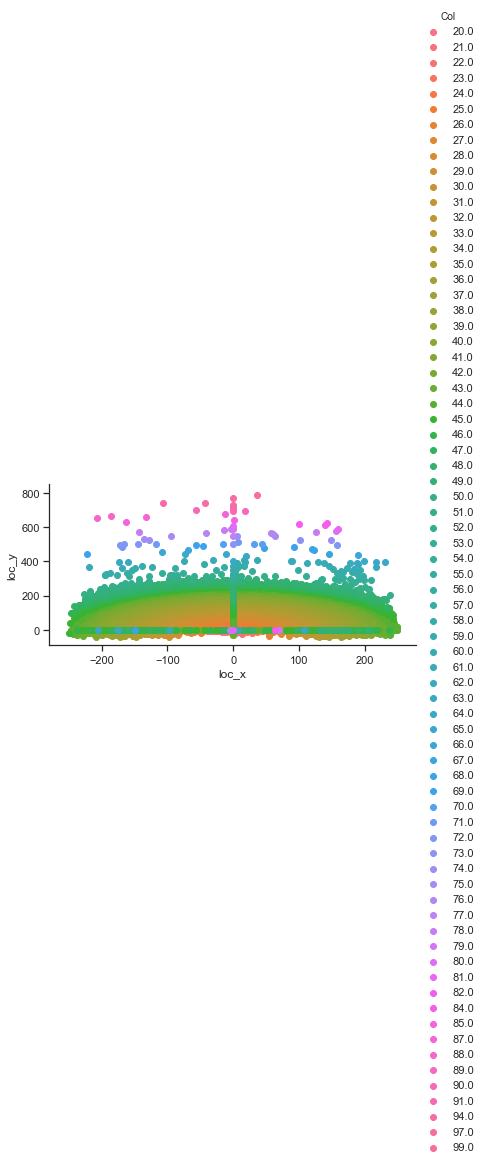

In [13]:
values = loc("distance_of_shot" , 0)
values

  0%|                                                   | 0/30697 [00:00<?, ?it/s]c:\users\bharat\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
100%|██████████████████████████████████████| 30697/30697 [01:15<00:00, 408.42it/s]


array(['24+ ft.', 'Less Than 8 ft.', '16-24 ft.', ..., 'Less Than 8 ft.',
       '16-24 ft.', '24+ ft.'], dtype='<U15')

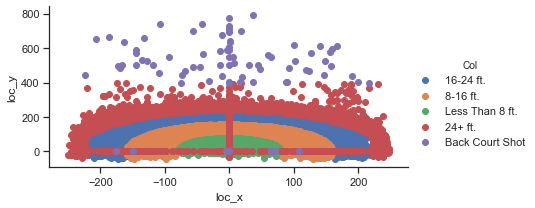

In [14]:
val = loc("range_of_shot" , 1)
val

  0%|                                                   | 0/30697 [00:00<?, ?it/s]c:\users\bharat\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
100%|██████████████████████████████████████| 30697/30697 [01:09<00:00, 442.82it/s]


array(['Center(C)', 'Center(C)', 'Left Side Center(LC)', ..., 'Center(C)',
       'Center(C)', 'Right Side(R)'], dtype='<U21')

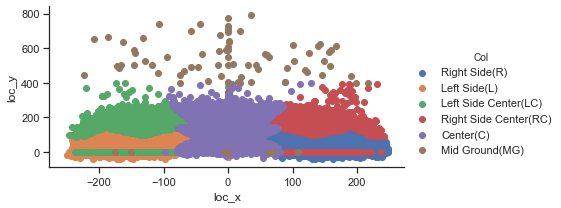

In [15]:
valu = loc("area_of_shot" , 1)
valu

  0%|                                                   | 0/30697 [00:00<?, ?it/s]c:\users\bharat\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
100%|██████████████████████████████████████| 30697/30697 [01:09<00:00, 441.39it/s]


array(['Penalty Spot', 'Goal Area', 'Mid Range', ..., 'Mid Range',
       'Mid Range', 'Goal Line'], dtype='<U15')

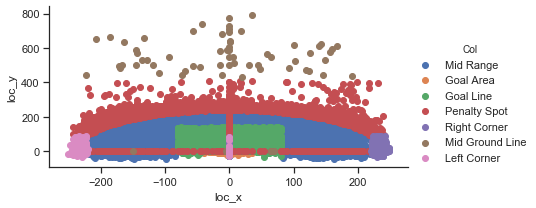

In [16]:
value = loc("shot_basics" , 1)
value

In [17]:
def same_columns(x,y,power):
    count = 0
    dataset[x] = dataset[x].replace(np.nan , 'x')
    dataset[y] = dataset[y].replace(np.nan , 'x')
    for i in tqdm(range(len(dataset))):
        if dataset[x][i] == 'x' and dataset[y][i] != 'x':
            if power == 1 and dataset[y][i]<=7:
                dataset[x][i] = dataset[y][i]
            elif power!=1:
                dataset[x][i] = dataset[y][i]
            else:
                pass
        elif dataset[x][i] == 'x' and dataset[y][i] == 'x':
            count += 1
        else:
            pass
    dataset[x] = dataset[x].replace('x' , np.nan)
    dataset[y] = dataset[y].replace('x' , np.nan)
    return count

In [18]:
a = same_columns("power_of_shot" , "power_of_shot.1",1)
a

  0%|                                                   | 0/30697 [00:00<?, ?it/s]c:\users\bharat\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
100%|██████████████████████████████████████| 30697/30697 [00:48<00:00, 633.67it/s]


70

In [19]:
b = same_columns("remaining_min" , "remaining_min.1",0)
b

  0%|                                                   | 0/30697 [00:00<?, ?it/s]c:\users\bharat\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
100%|██████████████████████████████████████| 30697/30697 [01:04<00:00, 475.83it/s]


81

In [20]:
c = same_columns("remaining_sec" , "remaining_sec.1",0)
c

  0%|                                                   | 0/30697 [00:00<?, ?it/s]c:\users\bharat\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
100%|██████████████████████████████████████| 30697/30697 [01:16<00:00, 402.17it/s]


77

In [21]:
c = same_columns("type_of_shot" , "type_of_combined_shot" , 0)
c

  0%|                                                   | 0/30697 [00:00<?, ?it/s]c:\users\bharat\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
100%|███████████████████████████████████████| 30697/30697 [14:25<00:00, 35.48it/s]


0

In [22]:
dataset["remaining_time"] = dataset["remaining_min"] + (dataset["remaining_sec"]/60)
dataset.drop("remaining_min" , axis =1, inplace =True)
dataset.drop("remaining_sec" , axis =1, inplace =True)
dataset.drop("team_id" , axis=1,inplace=True)
dataset.drop("team_name" , axis=1 ,inplace=True)
dataset.drop("match_event_id" , axis =1, inplace=True)
dataset.drop("knockout_match.1" , axis =1,inplace =True)
dataset.drop("distance_of_shot.1" ,axis=1,inplace=True)
dataset.drop("type_of_combined_shot" ,axis=1,inplace=True)
dataset.drop(dataset.columns[0] , axis=1,inplace=True)
dataset.drop("power_of_shot.1" , axis=1,inplace=True)
dataset.drop("remaining_min.1" ,axis=1, inplace=True)
dataset.drop("remaining_sec.1" ,axis=1, inplace=True)

In [23]:
def one_to_one(col):
    dic = {}
    for i in tqdm(range(len(dataset))):
        if i!=22902:
            if (dataset[col][i] is not np.nan):
                dic[dataset["match_id"][i]] = dataset[col][i]
    for i in tqdm(range(len(dataset))):
        if i!= 22902:
            if dataset[col][i] is np.nan:
                x = dataset["match_id"][i]
                dataset[col][i] = dic[x]
    temp = dataset.groupby("match_id")[col].transform(lambda x: x.nunique()==1)
    return temp.all()

In [24]:
x = one_to_one("home/away")
x

  0%|                                                   | 0/30697 [00:00<?, ?it/s]c:\users\bharat\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
100%|██████████████████████████████████████| 30697/30697 [01:04<00:00, 475.96it/s]


True

In [25]:
y = one_to_one("lat/lng")
y

  0%|                                                   | 0/30697 [00:00<?, ?it/s]c:\users\bharat\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
100%|██████████████████████████████████████| 30697/30697 [01:06<00:00, 462.44it/s]


True

In [26]:
z = one_to_one("date_of_game")
z

  0%|                                                   | 0/30697 [00:00<?, ?it/s]c:\users\bharat\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
100%|██████████████████████████████████████| 30697/30697 [01:05<00:00, 466.84it/s]


False

In [27]:
dataset[dataset["match_id"] == 29600031]

,location_x,location_y,power_of_shot,knockout_match,game_season,distance_of_shot,is_goal,area_of_shot,shot_basics,range_of_shot,date_of_game,home/away,shot_id_number,lat/lng,type_of_shot,match_id,remaining_time
22902,-131.0,97.0,2.0,0.0,1996-97,36.0,0.0,Left Side Center(LC),Mid Range,16-24 ft.,NaN,MANU @ NYK,22903.0,"40.708999, -73.872430",shot - 9,29600031,10.133333


In [28]:
dataset.drop(22902 , axis=0 , inplace =True)

In [29]:
z = one_to_one("date_of_game")
z

100%|████████████████████████████████████| 30696/30696 [00:00<00:00, 53147.31it/s]


True

In [30]:
bool_series = dataset["is_goal"].isna()
testdata = dataset[bool_series]
false_series = dataset["is_goal"].notnull()
training_data = dataset[false_series]

In [31]:
training_data.isna().sum()

location_x            0
location_y            0
power_of_shot       288
knockout_match        0
game_season           0
distance_of_shot      0
is_goal               0
area_of_shot          0
shot_basics           0
range_of_shot         0
date_of_game          0
home/away             0
shot_id_number        0
lat/lng               0
type_of_shot          0
match_id              0
remaining_time      126
dtype: int64

In [32]:
testdata.isna().sum()

location_x             0
location_y             0
power_of_shot         69
knockout_match         0
game_season            0
distance_of_shot       0
is_goal             6268
area_of_shot           0
shot_basics            0
range_of_shot          0
date_of_game           0
home/away              0
shot_id_number         0
lat/lng                0
type_of_shot           0
match_id               0
remaining_time        32
dtype: int64

In [33]:
training_data.dropna(inplace=True)

c:\users\bharat\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
training_data.isna().sum()

location_x          0
location_y          0
power_of_shot       0
knockout_match      0
game_season         0
distance_of_shot    0
is_goal             0
area_of_shot        0
shot_basics         0
range_of_shot       0
date_of_game        0
home/away           0
shot_id_number      0
lat/lng             0
type_of_shot        0
match_id            0
remaining_time      0
dtype: int64

In [35]:
med =testdata["power_of_shot"].median()

In [36]:
testdata["power_of_shot"].fillna(med , inplace=True)

c:\users\bharat\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [37]:
med = testdata["remaining_time"].median()
med

5.183333333333334

In [38]:
testdata["remaining_time"].fillna(med ,inplace=True)

In [39]:
testdata.isna().sum()

location_x             0
location_y             0
power_of_shot          0
knockout_match         0
game_season            0
distance_of_shot       0
is_goal             6268
area_of_shot           0
shot_basics            0
range_of_shot          0
date_of_game           0
home/away              0
shot_id_number         0
lat/lng                0
type_of_shot           0
match_id               0
remaining_time         0
dtype: int64

In [40]:
training_data.isna().sum()

location_x          0
location_y          0
power_of_shot       0
knockout_match      0
game_season         0
distance_of_shot    0
is_goal             0
area_of_shot        0
shot_basics         0
range_of_shot       0
date_of_game        0
home/away           0
shot_id_number      0
lat/lng             0
type_of_shot        0
match_id            0
remaining_time      0
dtype: int64

In [41]:
len(training_data)

24016

In [42]:
len(testdata)

6268

In [43]:
training_data.to_csv("cleaned_training_data2.csv" , index=False)

In [44]:
testdata.to_csv("cleaned_test_data2.csv" , index=False)

In [45]:
df_train = pd.read_csv("cleaned_training_data2.csv")
df_test = pd.read_csv("cleaned_test_data2.csv")
df_test.columns

Index(['location_x', 'location_y', 'power_of_shot', 'knockout_match',
       'game_season', 'distance_of_shot', 'is_goal', 'area_of_shot',
       'shot_basics', 'range_of_shot', 'date_of_game', 'home/away',
       'shot_id_number', 'lat/lng', 'type_of_shot', 'match_id',
       'remaining_time'],
      dtype='object')

In [46]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_train["game_season"] = le.fit_transform(df_train.iloc[:,4].values)
df_test["game_season"] = le.transform(df_test.iloc[:,4].values)

one_hot = pd.get_dummies(df_train["area_of_shot"] , drop_first=True)
df_train = df_train.join(one_hot)
df_train.drop("area_of_shot" , axis=1, inplace=True)

one_hot = pd.get_dummies(df_train["range_of_shot"] , drop_first=True)
df_train = df_train.join(one_hot)
df_train.drop("range_of_shot" , axis=1, inplace=True)

one_hot = pd.get_dummies(df_train["shot_basics"] , drop_first=True)
df_train = df_train.join(one_hot)
df_train.drop("shot_basics" , axis=1 , inplace=True)

one_hot = pd.get_dummies(df_train["home/away"] , drop_first=True)
df_train = df_train.join(one_hot)
df_train.drop("home/away" , axis=1 , inplace=True)

one_hot = pd.get_dummies(df_train["type_of_shot"] , drop_first=True)
df_train = df_train.join(one_hot)
df_train.drop("type_of_shot" , axis=1, inplace=True)

one_hot = pd.get_dummies(df_train["lat/lng"] , drop_first=True)
df_train = df_train.join(one_hot)
df_train.drop("lat/lng" , axis=1,inplace=True)
df_train.drop("date_of_game" , axis=1 , inplace=True)
df_train.drop("shot_id_number" ,axis=1 ,inplace=True)
#df_train.drop("match_id" , axis=1 ,inplace=True)

In [47]:
one_hot = pd.get_dummies(df_test["area_of_shot"] , drop_first=True)
df_test = df_test.join(one_hot)
df_test.drop("area_of_shot" , axis=1, inplace=True)

one_hot = pd.get_dummies(df_test["range_of_shot"] , drop_first=True)
df_test = df_test.join(one_hot)
df_test.drop("range_of_shot" , axis=1, inplace=True)

one_hot = pd.get_dummies(df_test["shot_basics"] , drop_first=True)
df_test = df_test.join(one_hot)
df_test.drop("shot_basics" , axis=1 , inplace=True)

one_hot = pd.get_dummies(df_test["home/away"] , drop_first=True)
df_test = df_test.join(one_hot , lsuffix="left" , rsuffix="right")
df_test.drop("home/away" , axis=1 , inplace=True)

one_hot = pd.get_dummies(df_test["type_of_shot"] , drop_first=True)
df_test = df_test.join(one_hot)
df_test.drop("type_of_shot" , axis=1, inplace=True)

one_hot = pd.get_dummies(df_test["lat/lng"] , drop_first=True)
df_test = df_test.join(one_hot)
df_test.drop("lat/lng" , axis=1,inplace=True)
df_test.drop("date_of_game" , axis=1 , inplace=True)
df_test.drop("shot_id_number" ,axis=1 ,inplace=True)
#df_test.drop("match_id" , axis=1 ,inplace=True)

In [48]:
x = df_train.iloc[: , df_train.columns != "is_goal"].values
y = df_train.iloc[: , df_train.columns == "is_goal"].values

In [49]:
X = df_test.iloc[: , df_train.columns != "is_goal"].values
Y = df_test.iloc[: , df_train.columns == "is_goal"].values

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
from xgboost import XGBClassifier
model = XGBClassifier(max_depth=2 ,learning_rate=0.05)
model.fit(X_train , y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test , y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

c:\users\bharat\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\users\bharat\appdata\local\programs\python\python36\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 62.45%


In [51]:
X = sc.transform(X)
y_pred = model.predict_proba(X)
temp = pd.read_csv("cleaned_test_data2.csv")
temp["shot_id_number"] = temp["shot_id_number"].astype('int64')
result = pd.DataFrame(data={"shot_id_number" : temp["shot_id_number"], "is_goal" : y_pred[:, 1]})
result

,shot_id_number,is_goal
0,1,0.405227
1,8,0.531364
2,17,0.592319
3,20,0.629232
4,22,0.405227
5,33,0.405227
6,34,0.405227
7,35,0.433214
8,36,0.433214
9,37,0.627864


In [52]:
result.to_csv("deepak_hirawat_220199_6.csv", index=False)

In [53]:
df_test = df_test.iloc[: , df_test.columns != "is_goal"]
importances = pd.DataFrame({"columns":df_test.columns , "importances":model.feature_importances_})
importances.sort_values("importances" ,ascending=False)

,columns,importances
5,distance_of_shot,0.153326
128,shot - 39,0.147588
96,shot - 1,0.099508
13,24+ ft.,0.075694
134,shot - 44,0.073657
7,remaining_time,0.049792
99,shot - 12,0.048874
16,Less Than 8 ft.,0.046914
104,shot - 17,0.041420
125,shot - 36,0.033623
